In [2]:
import pandas as pd
import numpy as np

In [3]:
cancer = pd.read_csv('breast_cancer.csv')
loan = pd.read_csv('train.csv')

In [4]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
loan.Gender = loan.Gender.fillna('Male')
loan.Dependents = loan.Dependents.fillna(0)
loan.Married = loan.Married.fillna(loan.Married.mode()[0])
loan.Self_Employed = loan.Self_Employed.fillna(loan.Self_Employed.mode()[0])
loan.LoanAmount =loan.LoanAmount.fillna(loan.LoanAmount.mean())
loan.Loan_Amount_Term =loan.Loan_Amount_Term.fillna(loan.Loan_Amount_Term.mean())
loan.Credit_History = loan.Credit_History.fillna(loan.Credit_History.mean())

In [8]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
loan_temp = loan.drop(['Loan_Status','Loan_ID'],axis=1)
loan_dummies = pd.get_dummies(loan_temp)
loan_dummies.Loan_Status = loan.Loan_Status

C:\Users\Name\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
loan_dummies['Loan_Status']=loan.Loan_Status
loan_dummies.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Loan_Status'],
      dtype='object')

In [11]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(loan_dummies,test_size=0.3,random_state=0)

In [12]:
train_x = train.drop('Loan_Status',axis=1)
test_x = test.drop('Loan_Status',axis=1)
train_y= train['Loan_Status']
test_y =test['Loan_Status']

In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_x,train_y)
test_pred = model.predict(test_x)

In [14]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(test_y,test_pred)

0.8324324324324325

In [15]:
df_pred = pd.DataFrame({'actual':test_y,'predicted':test_pred})
from sklearn.metrics import confusion_matrix
tn,fp,fn,tp = confusion_matrix(df_pred['actual'],df_pred['predicted']).ravel()
tn,fp,fn,tp

(22, 29, 2, 132)

In [16]:
sensitivity = tp/(tp+fn)
sensitivity

0.9850746268656716

In [17]:
specificity = tn/(tn+fp)
specificity

0.43137254901960786

In [19]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold =KFold(n_splits=5,shuffle =True)
result = cross_val_score(model,train_x,train_y,cv=kfold,scoring='accuracy')
print(result.mean())

0.7902872777017784


# Digit Recogniser 

In [175]:
train = pd.read_csv('digittrain.csv')
test=pd.read_csv('digittest.csv')

In [179]:
train,test =train_test_split(train,test_size=0.3,random_state=0)
train_x =train.drop('label',axis=1)
test_x=test.drop('label',axis=1)
train_y =train['label']
test_y =test['label']

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_x,train_y)
test_pred = model.predict(test_x)

In [ ]:
accuracy_score(test_y,test_pred)

In [1]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits
digits=load_digits()

In [2]:
digits

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

In [5]:
d0 =digits.data[0]
i0 = digits.images[0,:,:]
t0=digits.target[0]

In [12]:
d0

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [11]:
i0

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

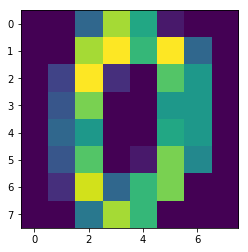

In [13]:
plt.imshow(i0)

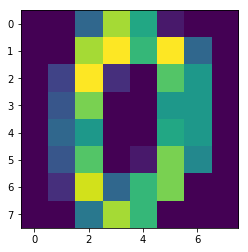

In [14]:
plt.imshow(d0.reshape(8,8))

In [17]:
len(digits.images)

1797

In [20]:
from sklearn.model_selection import train_test_split
[train_x,test_x,train_y,test_y] = train_test_split(digits.data,digits.target,test_size=0.3,random_state=0)

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_x,train_y)
test_pred = model.predict(test_x)

In [22]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(test_y,test_pred)

0.9537037037037037

In [23]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold =KFold(n_splits=5,shuffle =True)
result = cross_val_score(model,train_x,train_y,cv=kfold,scoring='accuracy')
print(result.mean())

0.9530544488711821


In [44]:
import pandas as pd
df_pred = pd.DataFrame({'actual':test_y,'predicted':test_pred})
df_pred

,actual,predicted
0,2,2
1,8,8
2,2,2
3,6,6
4,6,6
5,7,7
6,1,1
7,9,9
8,8,8
9,5,5


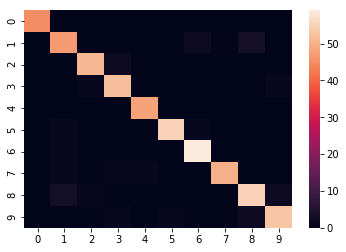

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(df_pred['actual'],df_pred['predicted']))


In [52]:
from sklearn.metrics import accuracy_score,classification_report
print(classification_report(test_y,test_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        45
          1       0.89      0.90      0.90        52
          2       0.96      0.96      0.96        53
          3       0.93      0.96      0.95        54
          4       0.98      1.00      0.99        48
          5       0.98      0.96      0.97        57
          6       0.95      0.98      0.97        60
          7       1.00      0.94      0.97        53
          8       0.92      0.90      0.91        61
          9       0.95      0.93      0.94        57

avg / total       0.95      0.95      0.95       540



# NPY file

In [58]:
import numpy as np
inp = np.load('inp.npy')
out = np.load('op.npy')

In [76]:
inp =inp.reshape(410,4096)

In [77]:
inp.shape

(410, 4096)

In [78]:
[train_x,test_x,train_y,test_y]= train_test_split(inp,out,test_size=0.3,random_state=0)

In [79]:
from sklearn.linear_model import LogisticRegression
model =LogisticRegression()
model.fit(train_x,train_y)
test_pred = model.predict(test_x)

C:\Users\Name\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y,test_pred)

0.983739837398374